In [2]:
from copy import deepcopy
import numpy as np
#import altair as alt

In [2]:
# Youngs modulus (Pa)
# Vary first dim 10e3 - 50e3
# Vary second dim 1e3 - 25e3
E1 = "[20e3 9e3]"
# Skin # Adipose

# Posson ratio - vary 0.48 - 0.499
NU = "[0.4 0.49]"

# Permeability - find ranges [m^4/N.s]=[m^2/(Pa.s)]
#10e-10 - 10e-12
PERM1 = "[0.5e-11 4e-11]"

# Target radius of tissue sample (m)
TTR = "5e-3"
# Target tichness for adipose tissue (m)
TTHA = "5e-3"
# Target thickness for skin tissue (m) - vary 0.9 - 1.6
TTHS = "1e-3"

In [3]:
# Midpoints
E1_MID = "[3e4, 1.3e4]"
NU_MID = "[0.485, 0.485]"
TTHS_MID = "1.25e-3"

In [4]:
base = {
    "E1": [20e3, 9e3],
    "NU": [0.4, 0.49],
    "PERM1": [0.5e-11, 4e-11],
    "TTR": 5e-3,
    "TTHA": 5e-3,
    "TTHS": 1e-3,
    "exp": "default",   
}

In [5]:
bounds = {
    "E1": [[10e3, 50e3,], [1e3, 25e3]],
    "NU": [[0.48, 0.499], [0.48, 0.499]],
    "PERM1": [[10e-10, 10e-12], [10e-10, 10e-12]],
    "TTHS": [0.9e-3, 1.6e-3]
}

all_bounds =  np.array(list(bounds.values())).flatten()
flat_bounds = []
for item in all_bounds:  
    if type(item) != float:
        flat_bounds.append(item[0])
        flat_bounds.append(item[1])
    else:
        flat_bounds.append(item)
flat_bounds


/tmp/ipykernel_539185/3373485031.py:8: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  all_bounds =  np.array(list(bounds.values())).flatten()


[10000.0,
 50000.0,
 1000.0,
 25000.0,
 0.48,
 0.499,
 0.48,
 0.499,
 1e-09,
 1e-11,
 1e-09,
 1e-11,
 0.0009,
 0.0016]

In [6]:
np.linspace(1e3, 25e3, 5)

array([ 1000.,  7000., 13000., 19000., 25000.])

In [7]:
tests = []
for key, val in bounds.items():
    print(key)
    
    if type(val[0]) != float:
        rand_first = np.linspace(val[0][0], val[1][1], 5)
        rand_second = np.linspace(val[1][0], val[1][1], 5)
        #print(f"tests {rand_second}")
        
        for i in range(2):
            other_dim = 0 if i == 1 else 1 
            other_val = base.get(key)[other_dim]
            
            for j in range(5):
                params = deepcopy(base)
                
                new_val = [0, 0]
                new_val[i] = rand_first[j] if i == 0 else rand_second[j]
                new_val[other_dim] = other_val
                
                params[key] = new_val
                params['exp'] = params['exp'] = f"{key}_{'skin' if i==0 else 'adiposes'}_{j}"
                tests.append(params)

            
    else:
        rand = np.linspace(val[0], val[1], 5)
        
        for i in range(5):
            params = deepcopy(base)
            params[key] = rand[i]
            
            
            params['exp'] = f"{key}_{i}"
            tests.append(params)

commands = []
tests.append(base)
for params in tests:
    print(params)
    cmd = "[{0[0]} {0[1]}], [{1[0]} {1[1]}], [{2[0]} {2[1]}], {3}, {4}, {5}, '{6}'".format(*params.values())
    commands.append(cmd)
    
commands

E1
NU
PERM1
TTHS
{'E1': [10000.0, 9000.0], 'NU': [0.4, 0.49], 'PERM1': [5e-12, 4e-11], 'TTR': 0.005, 'TTHA': 0.005, 'TTHS': 0.001, 'exp': 'E1_skin_0'}
{'E1': [13750.0, 9000.0], 'NU': [0.4, 0.49], 'PERM1': [5e-12, 4e-11], 'TTR': 0.005, 'TTHA': 0.005, 'TTHS': 0.001, 'exp': 'E1_skin_1'}
{'E1': [17500.0, 9000.0], 'NU': [0.4, 0.49], 'PERM1': [5e-12, 4e-11], 'TTR': 0.005, 'TTHA': 0.005, 'TTHS': 0.001, 'exp': 'E1_skin_2'}
{'E1': [21250.0, 9000.0], 'NU': [0.4, 0.49], 'PERM1': [5e-12, 4e-11], 'TTR': 0.005, 'TTHA': 0.005, 'TTHS': 0.001, 'exp': 'E1_skin_3'}
{'E1': [25000.0, 9000.0], 'NU': [0.4, 0.49], 'PERM1': [5e-12, 4e-11], 'TTR': 0.005, 'TTHA': 0.005, 'TTHS': 0.001, 'exp': 'E1_skin_4'}
{'E1': [20000.0, 1000.0], 'NU': [0.4, 0.49], 'PERM1': [5e-12, 4e-11], 'TTR': 0.005, 'TTHA': 0.005, 'TTHS': 0.001, 'exp': 'E1_adiposes_0'}
{'E1': [20000.0, 7000.0], 'NU': [0.4, 0.49], 'PERM1': [5e-12, 4e-11], 'TTR': 0.005, 'TTHA': 0.005, 'TTHS': 0.001, 'exp': 'E1_adiposes_1'}
{'E1': [20000.0, 13000.0], 'NU': [0.4

["[10000.0 9000.0], [0.4 0.49], [5e-12 4e-11], 0.005, 0.005, 0.001, 'E1_skin_0'",
 "[13750.0 9000.0], [0.4 0.49], [5e-12 4e-11], 0.005, 0.005, 0.001, 'E1_skin_1'",
 "[17500.0 9000.0], [0.4 0.49], [5e-12 4e-11], 0.005, 0.005, 0.001, 'E1_skin_2'",
 "[21250.0 9000.0], [0.4 0.49], [5e-12 4e-11], 0.005, 0.005, 0.001, 'E1_skin_3'",
 "[25000.0 9000.0], [0.4 0.49], [5e-12 4e-11], 0.005, 0.005, 0.001, 'E1_skin_4'",
 "[20000.0 1000.0], [0.4 0.49], [5e-12 4e-11], 0.005, 0.005, 0.001, 'E1_adiposes_0'",
 "[20000.0 7000.0], [0.4 0.49], [5e-12 4e-11], 0.005, 0.005, 0.001, 'E1_adiposes_1'",
 "[20000.0 13000.0], [0.4 0.49], [5e-12 4e-11], 0.005, 0.005, 0.001, 'E1_adiposes_2'",
 "[20000.0 19000.0], [0.4 0.49], [5e-12 4e-11], 0.005, 0.005, 0.001, 'E1_adiposes_3'",
 "[20000.0 25000.0], [0.4 0.49], [5e-12 4e-11], 0.005, 0.005, 0.001, 'E1_adiposes_4'",
 "[20000.0 9000.0], [0.48 0.49], [5e-12 4e-11], 0.005, 0.005, 0.001, 'NU_skin_0'",
 "[20000.0 9000.0], [0.48475 0.49], [5e-12 4e-11], 0.005, 0.005, 0.001, 'N

In [8]:
commands

["[10000.0 9000.0], [0.4 0.49], [5e-12 4e-11], 0.005, 0.005, 0.001, 'E1_skin_0'",
 "[13750.0 9000.0], [0.4 0.49], [5e-12 4e-11], 0.005, 0.005, 0.001, 'E1_skin_1'",
 "[17500.0 9000.0], [0.4 0.49], [5e-12 4e-11], 0.005, 0.005, 0.001, 'E1_skin_2'",
 "[21250.0 9000.0], [0.4 0.49], [5e-12 4e-11], 0.005, 0.005, 0.001, 'E1_skin_3'",
 "[25000.0 9000.0], [0.4 0.49], [5e-12 4e-11], 0.005, 0.005, 0.001, 'E1_skin_4'",
 "[20000.0 1000.0], [0.4 0.49], [5e-12 4e-11], 0.005, 0.005, 0.001, 'E1_adiposes_0'",
 "[20000.0 7000.0], [0.4 0.49], [5e-12 4e-11], 0.005, 0.005, 0.001, 'E1_adiposes_1'",
 "[20000.0 13000.0], [0.4 0.49], [5e-12 4e-11], 0.005, 0.005, 0.001, 'E1_adiposes_2'",
 "[20000.0 19000.0], [0.4 0.49], [5e-12 4e-11], 0.005, 0.005, 0.001, 'E1_adiposes_3'",
 "[20000.0 25000.0], [0.4 0.49], [5e-12 4e-11], 0.005, 0.005, 0.001, 'E1_adiposes_4'",
 "[20000.0 9000.0], [0.48 0.49], [5e-12 4e-11], 0.005, 0.005, 0.001, 'NU_skin_0'",
 "[20000.0 9000.0], [0.48475 0.49], [5e-12 4e-11], 0.005, 0.005, 0.001, 'N

tests = [
    # Default
    f"{E1_MID} , {NU_MID} , {PERM1} , {TTR} , {TTHA} , {TTHS_MID}, 'Default'",
    
    # E1 upper
    f"[50e3, 25e5], {NU} , {PERM1} , {TTR} , {TTHA} , {TTHS}, 'E1_Upper'",
    # E1 lower
    f"[10e3, 1e3], {NU} , {PERM1} , {TTR} , {TTHA} , {TTHS}, 'E1_Lower'",
    
    # NU upper
    f"{E1_MID}, [0.48, 0.49] , {PERM1} , {TTR} , {TTHA} , {TTHS}, 'NU_Upper'",
    # NU lower
    f"{E1_MID}, [0.499, 0.499], {PERM1} , {TTR} , {TTHA} , {TTHS}, 'NU_Lower'",
    
    # TTHS upper
    f"{E1_MID}, {NU_MID} , {PERM1} , {TTR} , {TTHA} , {1.6e-3}, 'TTHS_Upper'",
    # TTHS Lower
    f"{E1_MID}, {NU_MID} , {PERM1} , {TTR} , {TTHA} , {0.9e-3}, 'TTHS_Lower'"
    
    
]

In [10]:
commands

["[10000.0 9000.0], [0.4 0.49], [5e-12 4e-11], 0.005, 0.005, 0.001, 'E1_skin_0'",
 "[13750.0 9000.0], [0.4 0.49], [5e-12 4e-11], 0.005, 0.005, 0.001, 'E1_skin_1'",
 "[17500.0 9000.0], [0.4 0.49], [5e-12 4e-11], 0.005, 0.005, 0.001, 'E1_skin_2'",
 "[21250.0 9000.0], [0.4 0.49], [5e-12 4e-11], 0.005, 0.005, 0.001, 'E1_skin_3'",
 "[25000.0 9000.0], [0.4 0.49], [5e-12 4e-11], 0.005, 0.005, 0.001, 'E1_skin_4'",
 "[20000.0 1000.0], [0.4 0.49], [5e-12 4e-11], 0.005, 0.005, 0.001, 'E1_adiposes_0'",
 "[20000.0 7000.0], [0.4 0.49], [5e-12 4e-11], 0.005, 0.005, 0.001, 'E1_adiposes_1'",
 "[20000.0 13000.0], [0.4 0.49], [5e-12 4e-11], 0.005, 0.005, 0.001, 'E1_adiposes_2'",
 "[20000.0 19000.0], [0.4 0.49], [5e-12 4e-11], 0.005, 0.005, 0.001, 'E1_adiposes_3'",
 "[20000.0 25000.0], [0.4 0.49], [5e-12 4e-11], 0.005, 0.005, 0.001, 'E1_adiposes_4'",
 "[20000.0 9000.0], [0.48 0.49], [5e-12 4e-11], 0.005, 0.005, 0.001, 'NU_skin_0'",
 "[20000.0 9000.0], [0.48475 0.49], [5e-12 4e-11], 0.005, 0.005, 0.001, 'N

In [8]:
from subprocess import Popen
Popen(f"matlab -nodesktop -nosplash -r \"run_batch([20000.0 9000.0], [0.4 0.49], [5e-12 4e-11], 0.005, 0.005, 0.001, 'default')\"", shell=True)

<Popen: returncode: None args: 'matlab -nodesktop -nosplash -r "run_batch([2...>

In [110]:
from subprocess import Popen
procs = []

tths = []
for cmd in commands:
    if "TTHS" in cmd:
        tths.append(cmd)
        

for i, command in enumerate(tths):
    proc = Popen(f"cd Model_res && matlab -nodisplay -r \"run_batch({command})\"", shell=True)
    procs.append(proc)
    print(f"matlab -nodisplay -r \"run_batch({command})\"")
    
    if i%2 == 0 and i !=0:
        procs[i-1].wait()

matlab -nodisplay -r "run_batch([20000.0 9000.0], [0.4 0.49], [5e-12 4e-11], 0.005, 0.005, 0.0009, 'TTHS_0')"
matlab -nodisplay -r "run_batch([20000.0 9000.0], [0.4 0.49], [5e-12 4e-11], 0.005, 0.005, 0.001075, 'TTHS_1')"
matlab -nodisplay -r "run_batch([20000.0 9000.0], [0.4 0.49], [5e-12 4e-11], 0.005, 0.005, 0.00125, 'TTHS_2')"

                            < M A T L A B (R) >
                  Copyright 1984-2022 The MathWorks, Inc.
             R2022b Update 1 (9.13.0.2080170) 64-bit (glnxa64)
                             September 28, 2022


                            < M A T L A B (R) >
                  Copyright 1984-2022 The MathWorks, Inc.
             R2022b Update 1 (9.13.0.2080170) 64-bit (glnxa64)
                             September 28, 2022


                            < M A T L A B (R) >
                  Copyright 1984-2022 The MathWorks, Inc.
             R2022b Update 1 (9.13.0.2080170) 64-bit (glnxa64)
                             September 28, 2022

 
To get s

In [8]:
import os
import pandas as pd


results = []
variables = {
    "TTHS": "Skin Thickness",
    "NU": "Poisson's Ratio",
    "E1": "Young's Modulus",
    "PERM1": "Permeability"
}
for diry in os.listdir("Model_res"):
    if diry == "old":
        continue
    path = os.path.abspath("") + "/Model_res/" + diry
    probe1 = pd.read_csv(path + "/Disp1.csv",names=['time', 'displacement'], header=None)
    probe2 = pd.read_csv(path + "/Disp2.csv",names=['time', 'displacement'], header=None)
    
    for exp in tests:
        if exp.get("exp")  == diry:
            break
    print(diry, exp, "\n")        
    probe1['probe'] = "2mm"
    probe2['probe'] = "8mm"
    
    test = diry.split("_")
    if len(test) == 1:
        # Default experiment
        var = "all"
        val = "default"
        layer = "both"
    else:
        var = test[0]
        if len(test) == 2:
             # Varying 1D
            val = test[1]
            layer = "both"
        else:
             # Varying 2D
            var = test[0]
            val = test[2]
            layer = test[1] if test[1] != "adiposes" else "adipose"
    """if layer != "both":
        val = exp.get(var)[0 if layer == "skin" else 1]
    else:
        val = exp.get(var)"""
    
    var = variables.get(var, "Original")
    
    layer = layer.capitalize()
    probe1['variable'] = var
    probe1['value'] = val
    probe1['layer'] = layer
    probe2['variable'] = var
    probe2['value'] = val
    probe2['layer'] = layer
                     
    results.append(probe1)
    results.append(probe2)
        
    
    
    

#probe1 = [pd.read_csv(csv) for csv in probe1]
#probe2 = [pd.read_csv(csv) for csv in probe2]

#probe1 = pd.concat(probe1)
#probe2 = pd.concat(probe2)
#probe1['probe'] = 1
#probe2['probe'] = 2
results = pd.concat(results)

TTHS_1 {'E1': [20000.0, 9000.0], 'NU': [0.4, 0.49], 'PERM1': [5e-12, 4e-11], 'TTR': 0.005, 'TTHA': 0.005, 'TTHS': 0.001075, 'exp': 'TTHS_1'} 

E1_adiposes_3 {'E1': [20000.0, 19000.0], 'NU': [0.4, 0.49], 'PERM1': [5e-12, 4e-11], 'TTR': 0.005, 'TTHA': 0.005, 'TTHS': 0.001, 'exp': 'E1_adiposes_3'} 

PERM1_adiposes_3 {'E1': [20000.0, 9000.0], 'NU': [0.4, 0.49], 'PERM1': [5e-12, 2.575e-10], 'TTR': 0.005, 'TTHA': 0.005, 'TTHS': 0.001, 'exp': 'PERM1_adiposes_3'} 

PERM1_skin_3 {'E1': [20000.0, 9000.0], 'NU': [0.4, 0.49], 'PERM1': [2.575e-10, 4e-11], 'TTR': 0.005, 'TTHA': 0.005, 'TTHS': 0.001, 'exp': 'PERM1_skin_3'} 

default {'E1': [20000.0, 9000.0], 'NU': [0.4, 0.49], 'PERM1': [5e-12, 4e-11], 'TTR': 0.005, 'TTHA': 0.005, 'TTHS': 0.001, 'exp': 'default'} 

TTHS_3 {'E1': [20000.0, 9000.0], 'NU': [0.4, 0.49], 'PERM1': [5e-12, 4e-11], 'TTR': 0.005, 'TTHA': 0.005, 'TTHS': 0.001425, 'exp': 'TTHS_3'} 

PERM1_skin_2 {'E1': [20000.0, 9000.0], 'NU': [0.4, 0.49], 'PERM1': [5.05e-10, 4e-11], 'TTR': 0.00

In [9]:
results['displacement'] *= 1e3

In [19]:
alt.data_transformers.enable('default', max_rows=None)
base = alt.Chart(results).mark_line().encode(
    x=alt.X('time:Q', title="Time (s)"),
    y=alt.Y('displacement:Q', title="Displacement (mm)"),
    color=alt.Color('value:O', scale=alt.Scale(scheme="lighttealblue"))
).properties(
    width=150,
    height=150
)

no_labels = alt.Chart(results).mark_line().encode(
    x=alt.X('time:Q', title=""),
    y=alt.Y('displacement:Q', title=""),
    color='value:O'
).properties(
    width=150,
    height=150
)

no_labels_x = alt.Chart(results).mark_line().encode(
    x=alt.X('time:Q', title=""),
    y=alt.Y('displacement:Q', title="Displacement (mm)"),
    color='value:O'
).properties(
    width=150,
    height=150
)

no_labels_y = alt.Chart(results).mark_line().encode(
    x=alt.X('time:Q', title="Time (s)"),
    y=alt.Y('displacement:Q', title=""),
    color='value:O'
).properties(
    width=150,
    height=150
)

two_d_charts = []
default_charts = []
tths_charts = []
for probe in ["2mm", "8mm"]:
    probe_chart = alt.vconcat()
    probe_chart = alt.vconcat(probe_chart, base.encode(color=alt.value("black")).transform_filter(
            f"datum.variable== 'Original' && datum.probe =='{probe}'").properties(
            title=alt.TitleParams(text="Original", orient="left", offset=10) if probe=="2mm" else ""
        ),
                          center=True)
        
    probe_chart = alt.vconcat(probe_chart, base.transform_filter(
                f"datum.variable== 'Skin Thickness' && datum.probe =='{probe}'").properties(
                title=alt.TitleParams(text="Skin Thickness", orient="left", offset=10) if probe=="2mm" else ""
            ),
                             center=True)

    
    for layer in ["Skin", "Adipose"]: 
        layer_chart = alt.hconcat()
        for i, variable in enumerate(results['variable'].unique()):
            if variable in ["Skin Thickness", "Original"]:
                continue
                
            if i == 1:
                if layer == "Skin":
                    chart = no_labels_x
                else:
                    chart = base
            else:
                if layer == "Skin":
                    chart = no_labels
                else:
                    chart = no_labels_y
                
            #chart = base if i == 1 and layer=="" else no_labels
            
            layer_chart |= chart.transform_filter(
                (alt.datum.variable==variable) & (alt.datum.layer==layer) & (alt.datum.probe==probe)).properties(
                title=alt.TitleParams(text=variable if layer == "Skin" else "", orient="top", offset=10)
            )
        probe_chart &= layer_chart.properties(title=alt.TitleParams(
            text=layer if probe=="2mm" else "",
            orient="left",
            anchor="middle",
            offset=15
        ))
    two_d_charts.append(probe_chart.properties(title=f"Probe: {probe}"))
                                                                    #offset=10))))
alt.hconcat(*two_d_charts, center=True).configure_title(align="center", anchor="middle").save('chart.png', scale_factor=3.0)

In [31]:
alt.renderers.enable('default')

RendererRegistry.enable('default')

In [20]:
resy

{'E1': [20000.0, 9000.0], 'NU': [0.48, 0.49], 'PERM1': [5e-12, 4e-11], 'TTR': 0.005, 'TTHA': 0.005, 'TTHS': 0.001, 'exp': 'NU_skin_0'}
{'E1': [20000.0, 9000.0], 'NU': [0.48475, 0.49], 'PERM1': [5e-12, 4e-11], 'TTR': 0.005, 'TTHA': 0.005, 'TTHS': 0.001, 'exp': 'NU_skin_1'}
{'E1': [20000.0, 9000.0], 'NU': [0.4895, 0.49], 'PERM1': [5e-12, 4e-11], 'TTR': 0.005, 'TTHA': 0.005, 'TTHS': 0.001, 'exp': 'NU_skin_2'}
{'E1': [20000.0, 9000.0], 'NU': [0.49424999999999997, 0.49], 'PERM1': [5e-12, 4e-11], 'TTR': 0.005, 'TTHA': 0.005, 'TTHS': 0.001, 'exp': 'NU_skin_3'}
{'E1': [20000.0, 9000.0], 'NU': [0.499, 0.49], 'PERM1': [5e-12, 4e-11], 'TTR': 0.005, 'TTHA': 0.005, 'TTHS': 0.001, 'exp': 'NU_skin_4'}
{'E1': [20000.0, 9000.0], 'NU': [0.4, 0.48], 'PERM1': [5e-12, 4e-11], 'TTR': 0.005, 'TTHA': 0.005, 'TTHS': 0.001, 'exp': 'NU_adiposes_0'}
{'E1': [20000.0, 9000.0], 'NU': [0.4, 0.48475], 'PERM1': [5e-12, 4e-11], 'TTR': 0.005, 'TTHA': 0.005, 'TTHS': 0.001, 'exp': 'NU_adiposes_1'}
{'E1': [20000.0, 9000.0],

In [24]:
results.query("variable=='Skin Thickness' and probe=='8mm' and value=='2'")['time']

0      0.00000
1      0.00500
2      0.01100
3      0.01780
4      0.02524
        ...   
699    6.96500
700    6.97500
701    6.98500
702    6.99500
703    7.00000
Name: time, Length: 704, dtype: float64

<AxesSubplot:xlabel='time', ylabel='displacement'>

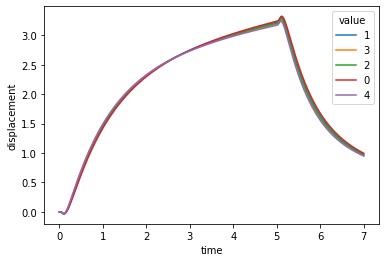

In [137]:
import seaborn as sns
sns.lineplot(data=a.reset_index(), x="time", y="displacement", hue="value")

In [122]:
import numpy as np
from scipy.stats import qmc
import pickle

class QMCSobolSequence():
    """
    Generates Sobol samples in the given bounds using the QMC module and the Sobol engine.
    """
    
    def __init__(this, dims, bounds, seed=None, init=None):
        this.sampler = qmc.Sobol(dims)
        this.bounds = bounds
        this.nSamples = 0
        
        if init == None:   
            this.samples = []
        else:
            this.samples = init
    
    
        if seed is not None:
            np.random.seed(seed)
            
        

    def sample(this, n):
        if not((n != 0) and (n & (n-1) == 0)):
            raise Exception("Balance properties lost if the number of samples is not a power of 2")
        
        samples = this.sampler.random_base2(n)
        samples = qmc.scale(samples, bounds[:, 0], bounds[:, 1])
        this.samples.append(samples)
        this.nSamples += n
        

        return samples
    
    def saveSamples(this, fname)
        with open(f"{fname}.pkl", "wb") as f:
            pickle.dump(this.samples, f)
            
    def loadSamples(this, fname):
        with open(f"{fname}.pkl", "rb") as f:
            this.samples = pickle.load(fname)
        
        n = 0
        for s in samples:
            n += len(s)
            
        this.nSamples = n
        
        # Reset the sampler and fast forward the number of points sampled
        sampler.reset()
        sampler.fast_forward(n)
# Generate Sobol samples
bounds = np.array([(0, 5), (0, 1), (0, 1)])
sap = QMCSobolSequence(3, bounds)

In [132]:
len(sap.sample(8))

ValueError: The balance properties of Sobol' points require n to be a power of 2. 512 points have been previously generated, then: n=512+2**8=768. If you still want to do this, the function 'Sobol.random()' can be used.

In [56]:
from sklearn.metrics import mean_squared_error
import random
import pickle
import os
from tqdm import tqdm
import numpy as np
from scipy.interpolate import interp1d
import pandas as pd
from numba import jit, cuda

SAMPLE_FILE = "samples.pkl"
SIGNAL_FOLDER = "D:\SamplingResults"

#jit(target_backend='cuda')  
def check():
    me = []
    mse = []
    sse = []
    pts = list(range(50, 500, 50))

    f = open(f"{SAMPLE_FILE}", "rb")
    samples = pickle.load(f).astype(np.float32)
    f.close()
    print(pts)
    for steps in pts:
        x_interped = []
        x_origin = []

        exps = os.listdir(f"{SIGNAL_FOLDER}/")

        for run in tqdm(exps):
            if int(run) > 50:
                break
            inp = []
            fail = False

            files = os.listdir(f"{SIGNAL_FOLDER}/{run}/")

            if files != ['Disp1.csv', 'Disp2.csv']:
                continue
                
            for file in files:
                a = pd.read_csv(f"{SIGNAL_FOLDER}/{run}/{file}")
                a.rename(columns = {'0':'x', '0.1': 'y'}, inplace = True)
                #a = pd.concat([pd.DataFrame([[0,0.1]], columns=a.columns), a], ignore_index=True)


                # Interpolate curve for consistent x values
                xNew = np.linspace(0, 7, num=steps, endpoint=False)
                interped = interp1d(a['x'], a['y'], kind='cubic', fill_value="extrapolate")(xNew)

                # Find closest value in original to interpreted
                orig = np.array(a['y'].values)
                closest = []
                for y in interped:

                    diff = []
                    for y_2 in orig:
                        # Get difference
                        diff.append(abs(y_2 - y))

                    # Find location of smallest difference
                    idx = np.array(diff).argmin()
                    # Use as representative point
                    closest.append(orig[idx])


                #fix, ax = plt.subplots(1, 2)
                #ax[0].plot(xNew, interped)
                #a.plot(ax=ax[1], x='x', y='y')
                #if run == 3:
                   # break


                #if len(a) < 702:
                #    print(f"{signalFolder}/{run}/{file}: {len(a)}")
               #     fail = True
                 #   break

               # while len(a) > 702:
                #    a = a.drop(index=np.random.randint(0, len(a)-1)).reset_index(drop=True)

                #print(a)

                x_interped.append(interped.astype(np.float32))
                x_origin.append(closest)
                #print(closest, "\n\n", x_origin)




            if not fail:
                x_origin = np.array(x_origin).flatten()
                x_interped = np.array(x_interped).flatten()
                #print(x_origin, "\n", x_interped, "\n", steps)
                mse.append(mean_squared_error(x_origin, x_interped))
                sse.append(mse[-1]*len(x_origin))
                me.append(np.max(np.absolute(np.array(x_origin) - np.array(x_interped))))
                x_origin = []
                x_interped = []

    print(f"{mse}\n\n {sse}\n\n {me}")


In [57]:
check()

[50, 100, 150, 200, 250, 300, 350, 400, 450]


  0%|                                                                              | 3/65536 [00:00<2:44:43,  6.63it/s]

[1.9323953535150696e-11, 2.3549222491139615e-10, 2.5127476691982884e-13, 1.1980920036747699e-11, 1.7435843812159356e-10, 1.3230852393556146e-13, 7.298133408002208e-12, 1.1560270621199706e-10, 4.324284938750882e-13, 7.587028386072885e-12, 9.713018943358911e-11, 4.3999811649333165e-13, 8.201684410514376e-12, 8.517831170628638e-11, 5.51371071923194e-13, 6.523105863259021e-12, 8.742493400157412e-11, 6.94205261218426e-13, 7.2309464054541365e-12, 1.458235564375804e-10, 7.423878157755432e-13, 6.372142126609072e-12, 7.81963466773621e-11, 5.233579245492805e-13, 5.717859728609403e-12, 7.995934702524556e-11, 5.850590602473936e-13]

 [1.9323953535150695e-09, 2.3549222491139616e-08, 2.5127476691982884e-11, 2.3961840073495398e-09, 3.487168762431871e-08, 2.646170478711229e-11, 2.1894400224006625e-09, 3.468081186359912e-08, 1.2972854816252645e-10, 3.0348113544291537e-09, 3.885207577343564e-08, 1.7599924659733266e-10, 4.1008422052571885e-09, 4.258915585314319e-08, 2.75685535961597e-10, 3.91386351795541